In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# первоначально были исправлены ошибки в названиях авто

symboling: Рейтинг риска автомобиля (страховой показатель)..
CarName: Название или модель автомобиля.
aspiration: Тип наддува двигателя.
doornumber: Количество дверей в автомобиле.
carbody: Тип кузова автомобиля.
enginelocation: Расположение двигателя.
wheelbase: Колёсная база автомобиля.
carlength: Длина автомобиля.
carwidth: Ширина автомобиля.
carheight: Высота автомобиля.
curbweight: Снаряжённая масса автомобиля (вес без пассажиров и груза).
enginetype: Тип двигателя.
cylindernumber: Количество цилиндров в двигателе.
enginesize: Объём двигателя.
fuelsystem: Топливная система автомобиля.
boreratio: Диаметр цилиндра.
stroke: Ход поршня.
compressionratio: Степень сжатия.
horsepower: Мощность двигателя в лошадиных силах.
peakrpm: Максимальные обороты двигателя.
citympg: Расход топлива в городе (мили на галлон).
highwaympg: Расход топлива на шоссе (мили на галлон).
price: Цена автомобиля.

# EDA

In [ ]:
df=pd.read_csv("CarPrice_Assignment.csv")
sns.set(style = 'darkgrid')

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.shape

(205, 26)

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

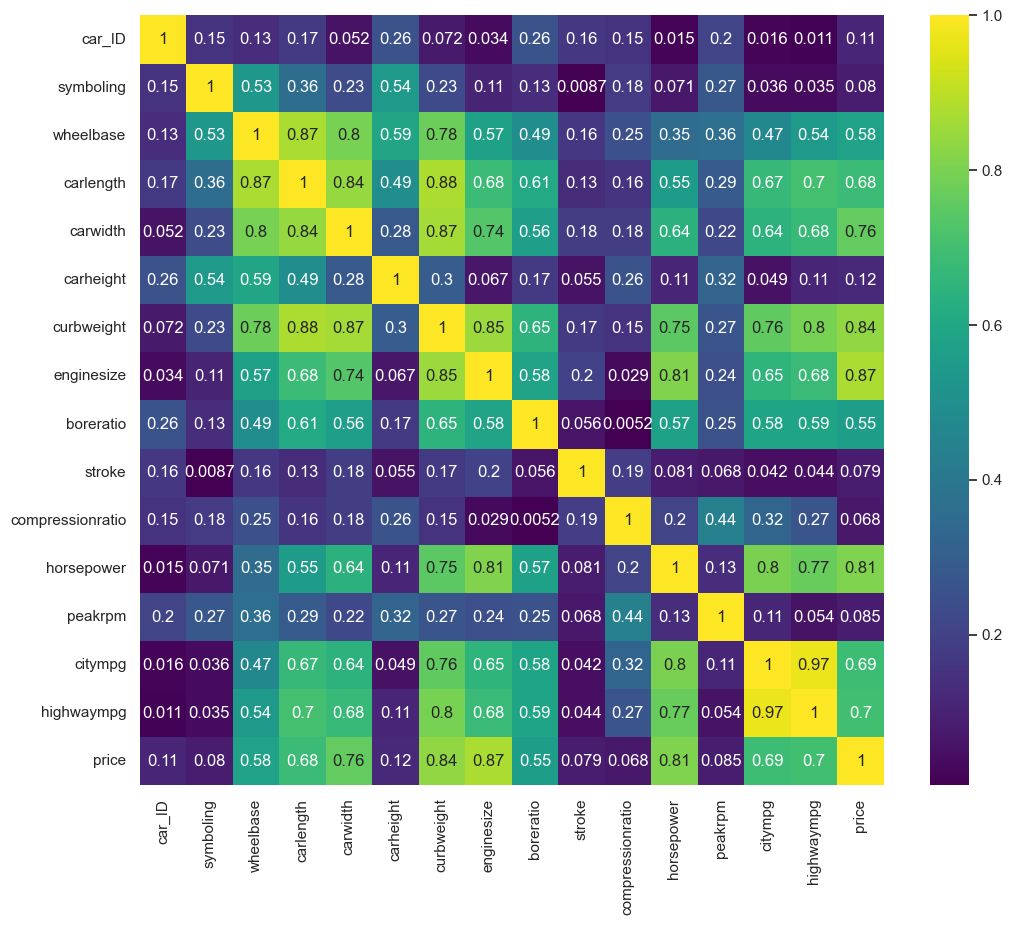

In [ ]:
df_mod = df.select_dtypes(include=[float, int])

plt.figure(figsize = (12, 10))
sns.heatmap(abs(df_mod.corr()), annot = True, cmap="viridis")
plt.show()

# создание атрибута, который будет содержать в себе марки автомобилей

In [ ]:
brands = ['alfa romeo', 'chevrolet', 'bmw', 'audi','dodge','honda','isuzu','jaguar','mazda','buick','mercury','mitsubishi','nissan','peugeot','plymouth','porsche','renault','saab','subaru','toyota','volkswagen','volvo']

In [ ]:
def extract_brand(car_name):
    for brand in brands:
        if car_name.startswith(brand):
            return brand
    return car_name.split()[0]
df['Brand'] = df['CarName'].apply(extract_brand)

# Хи квадрат тест

In [ ]:
dtype_dict = {
    'fueltype': 'category',
    'aspiration': 'category',
    'carbody': 'category',
    'drivewheel': 'category',
    'enginelocation': 'category',
    'enginetype': 'category',
    'fuelsystem': 'category',
    'Brand': 'category',
}
df = df.astype(dtype_dict)

Text(0.5, 0, 'P-value')

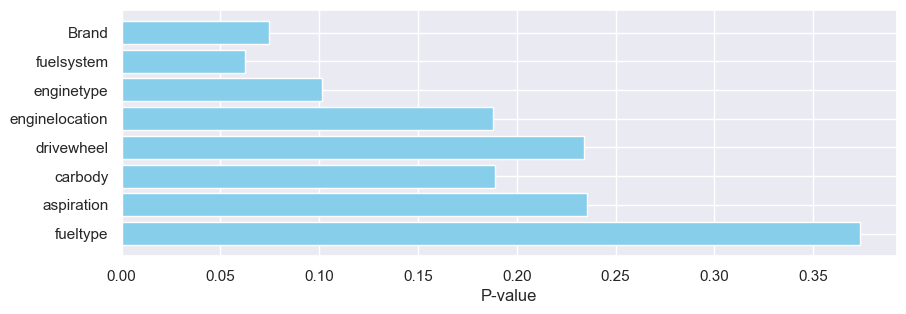

In [ ]:
from scipy.stats import chi2_contingency
contingency_tables = {}
for column in df.columns:
    if column != 'price' and df[column].dtype == 'category':
        contingency_table = pd.crosstab(df['price'], df[column])
        if not contingency_table.empty:
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            contingency_tables[column] = {'Chi-square': chi2, 'P-value': p_value}

attributes = list(contingency_tables.keys())
p_values = [table['P-value'] for table in contingency_tables.values()]
attributes = list(contingency_tables.keys())
p_values = [table['P-value'] for table in contingency_tables.values()]
plt.figure(figsize=(10, len(attributes) * 0.4))
plt.barh(attributes, p_values, color='skyblue')
plt.xlabel('P-value')

как мы видим сильное влияние на стоимость оказывает бренд и топливная система

<Axes: xlabel='price', ylabel='fuelsystem'>

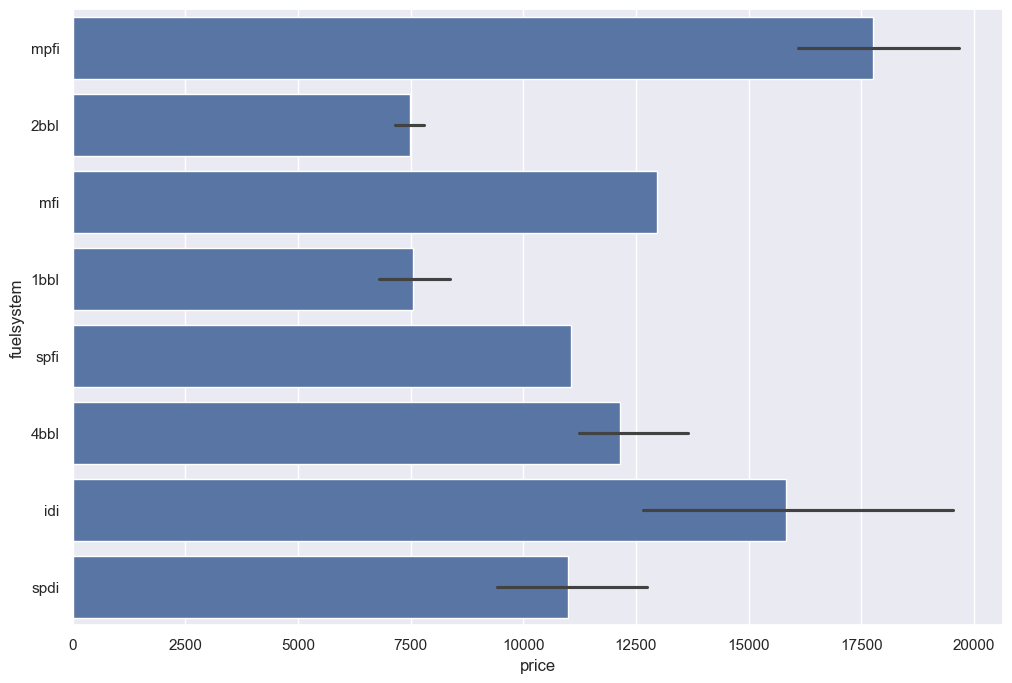

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='fuelsystem', data=df)

самая дорогая топливная система mpfi и idi

<Axes: xlabel='price', ylabel='Brand'>

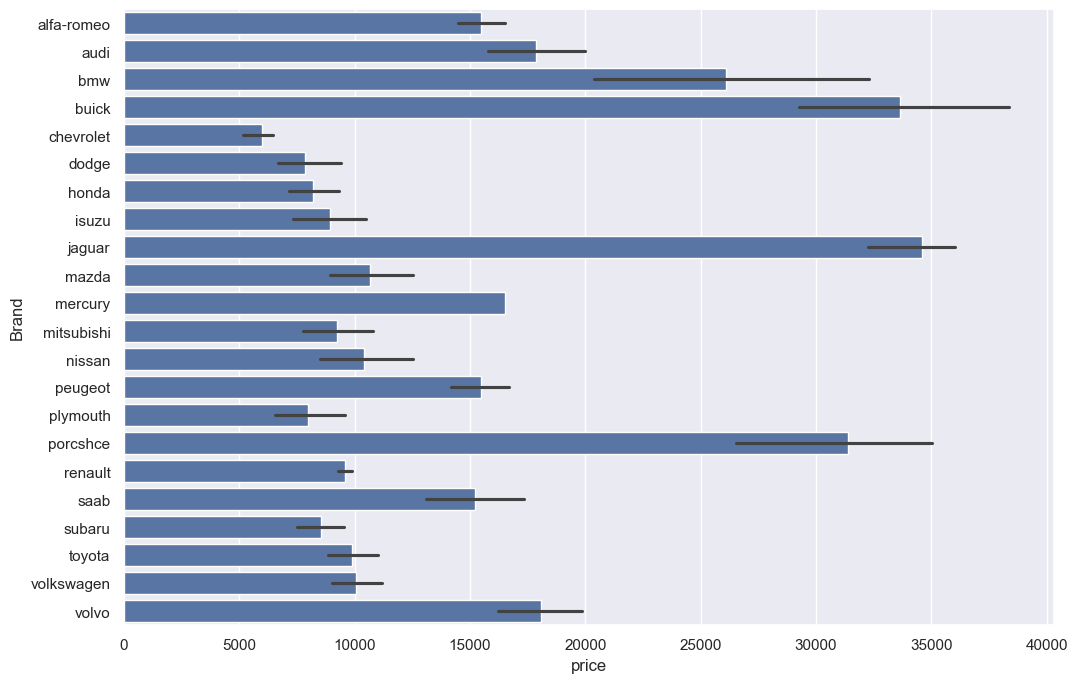

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='Brand', data=df)

этот график визуализирует стоимость автомобиля у разных брендов, самыми дорогими являются ягуар порш и буик, самый дешевый бренд это шевроле

<Figure size 640x480 with 0 Axes>

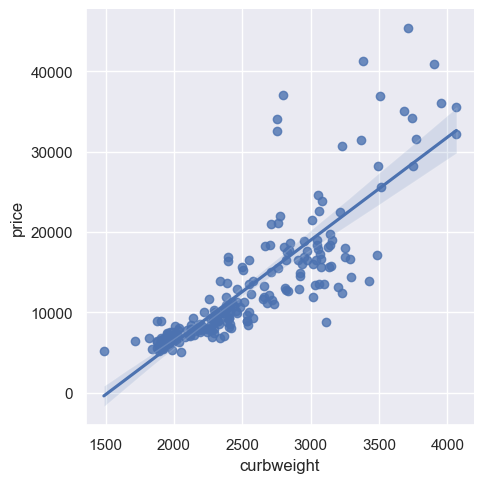

In [ ]:
plt.figure("зависимость массы автомобился от стоимости")
sns.lmplot(df,x='curbweight', y='price')

между атрибутами присутствует почти прямая линейная зависимость

<Axes: title={'center': 'зависимость стоимости авто от цены'}, xlabel='price', ylabel='horsepower'>

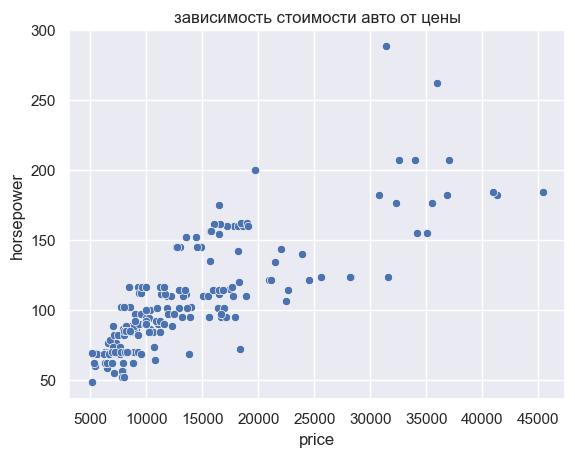

In [ ]:
plt.title("зависимость стоимости авто от цены")
sns.scatterplot(df,x='price',y='horsepower')

прослеживается сильная линейная зависимость с увелиичением мощности лошадиной силы увеличивается и стоимость

<Axes: title={'center': 'зависимость стоимости авто от количества цилиндров'}, xlabel='cylindernumber', ylabel='price'>

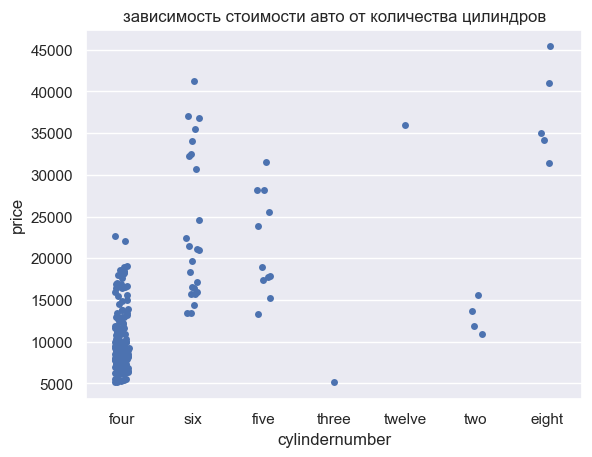

In [ ]:
plt.title("зависимость стоимости авто от количества цилиндров")
sns.stripplot(df,x='cylindernumber',y='price')

<Axes: xlabel='enginelocation', ylabel='Count'>

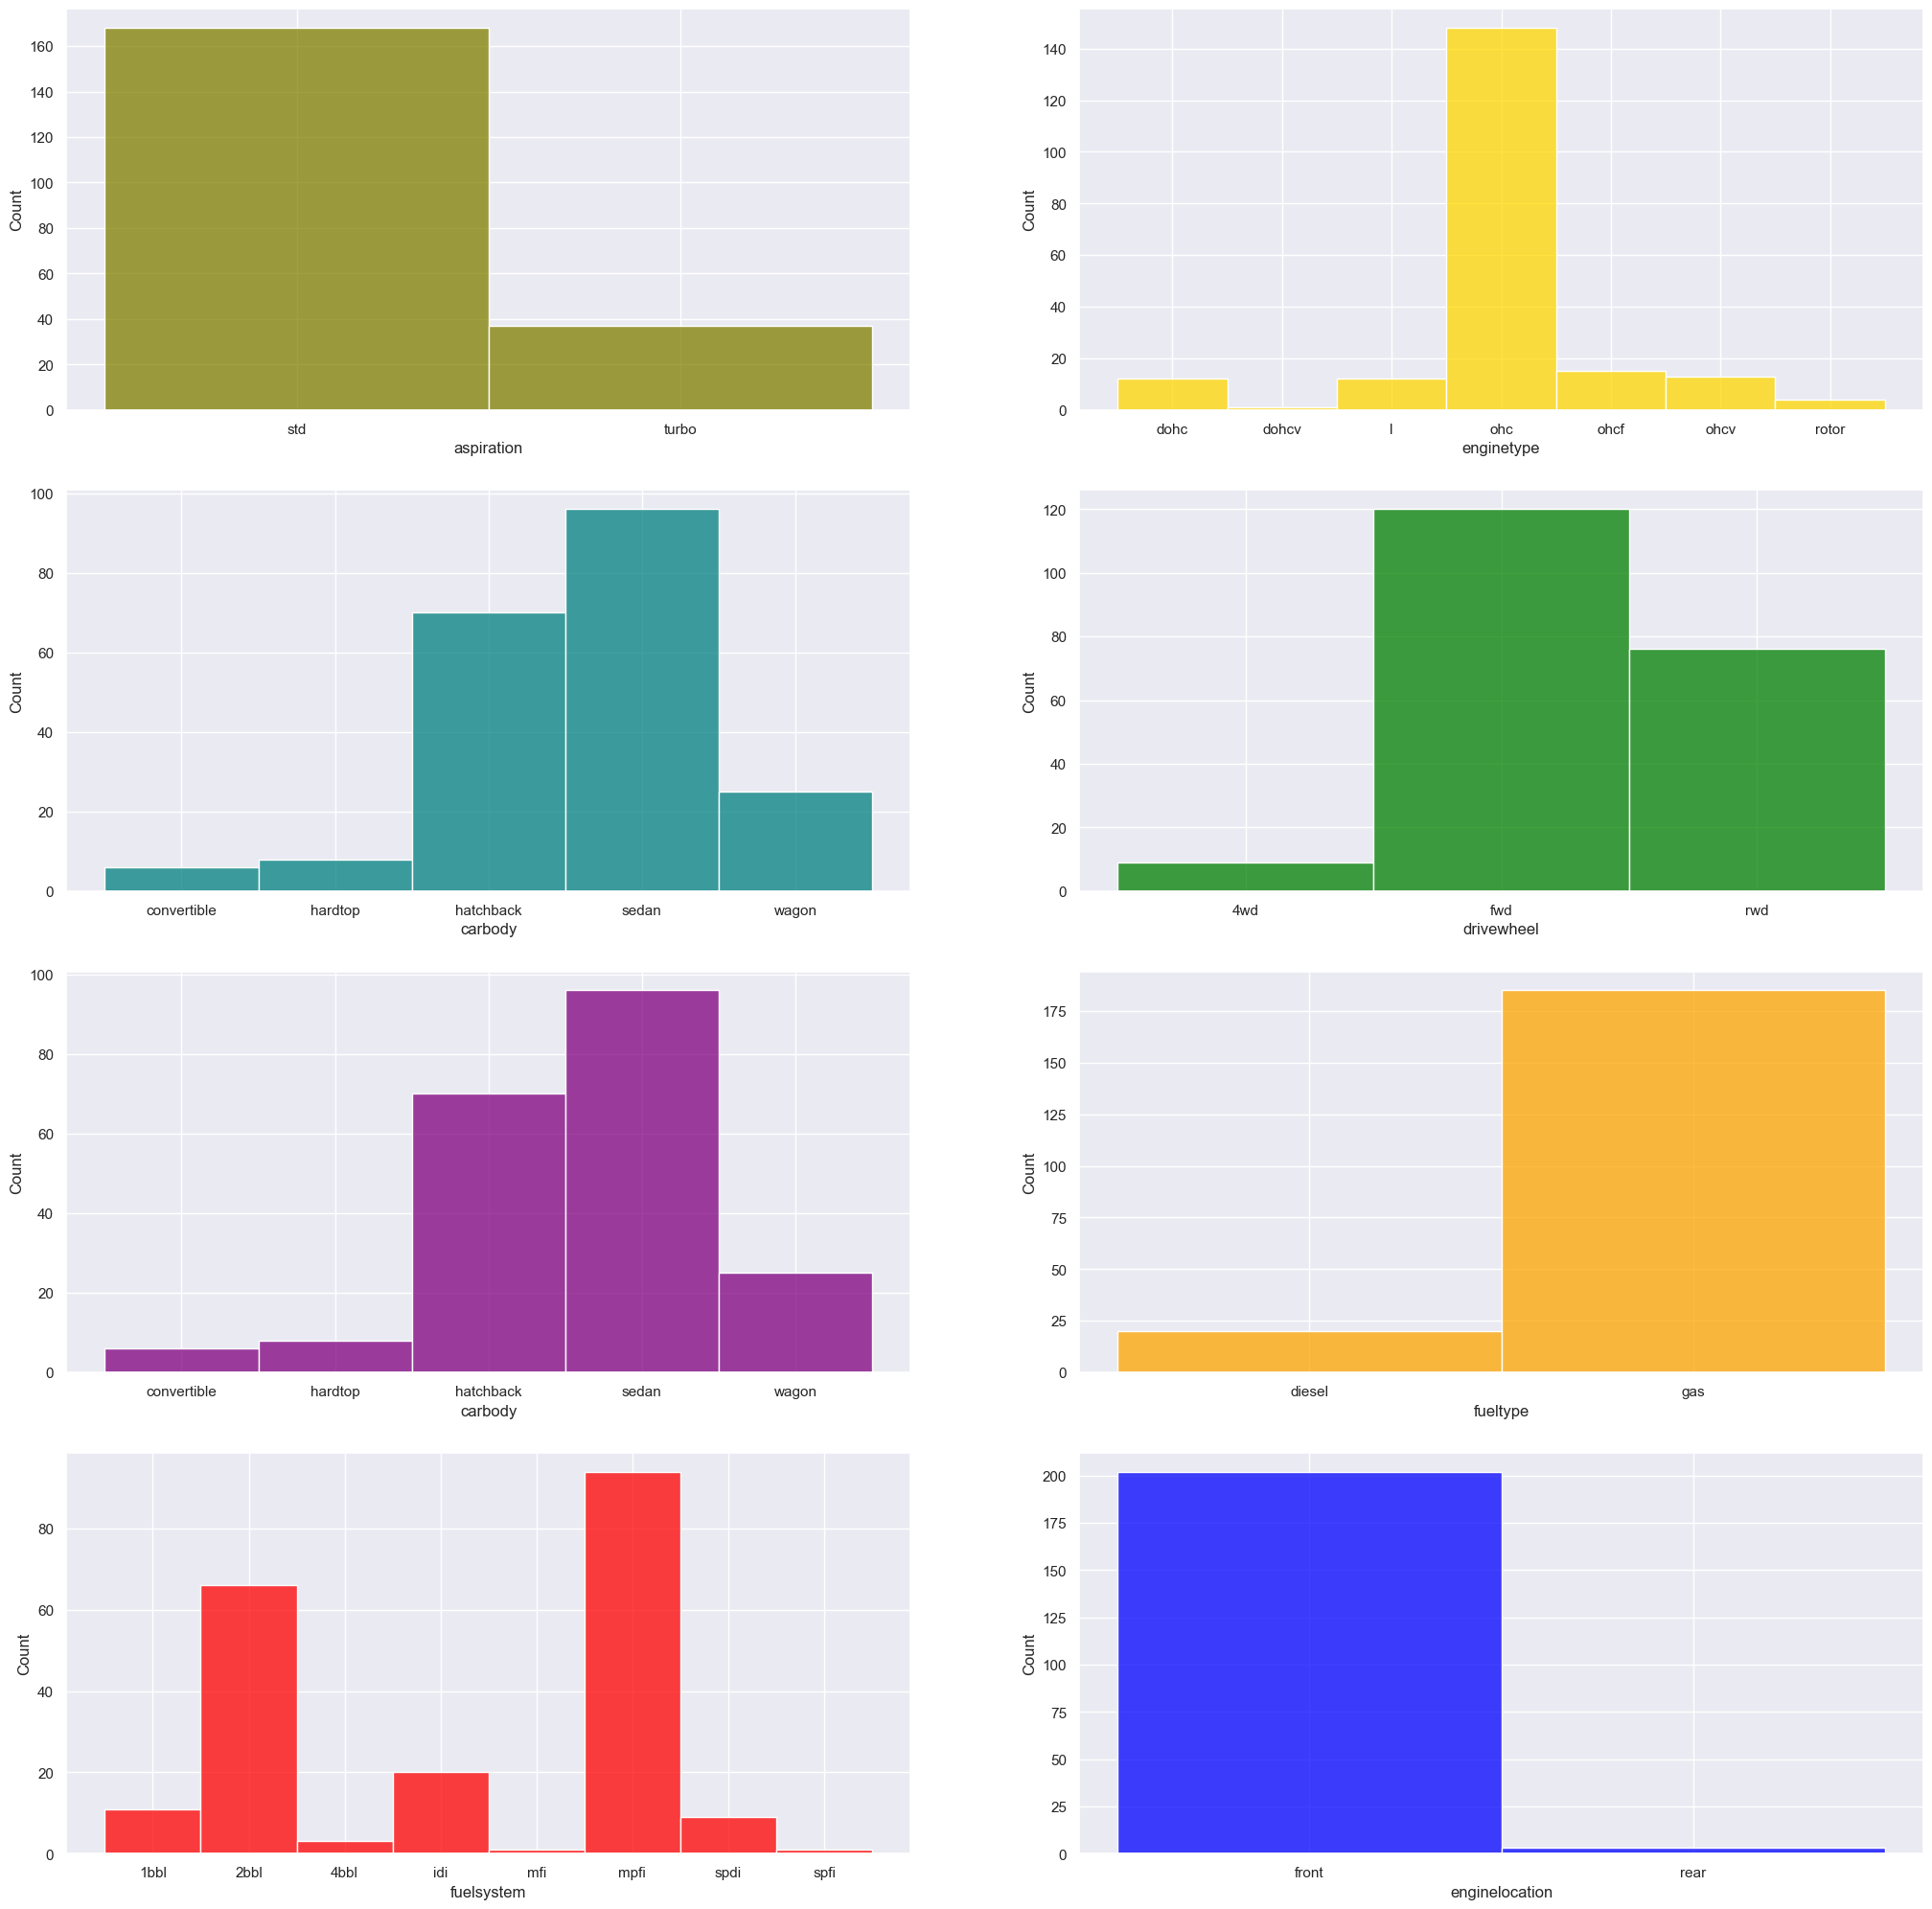

In [ ]:
fig, axs = plt.subplots(4,2, figsize = (25,25))
sns.histplot(data=df, x="aspiration", color="olive", ax=axs[0, 0])
sns.histplot(data=df, x="enginetype", color="gold", ax=axs[0, 1])
sns.histplot(data=df, x="carbody", color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="drivewheel", color="green", ax=axs[1, 1])
sns.histplot(data=df, x="carbody", color="purple", ax=axs[2, 0])
sns.histplot(data=df, x="fueltype", color="orange", ax=axs[2, 1])
sns.histplot(data=df, x="fuelsystem", color="red", ax=axs[3, 0])
sns.histplot(data=df, x="enginelocation", color="blue", ax=axs[3, 1])

этот график изображает распределение значений категориальных атрибутов

In [ ]:
highestprice=df[df['price']==45400]
highestprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.8,3.35,8.0,184,4500,14,16,45400.0,buick


самый дорогой автомобиль

In [ ]:
lowestprice=df[df['price']==5118]
lowestprice

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru


самый дешевый автомобиль

далее были созданы две выборки данных

# Data preprocessing 1

In [ ]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [ ]:
str_to_num = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(str_to_num)

In [ ]:
str_to_num = {
    'two': 2,
    'four': 4,
}
df['doornumber'] = df['doornumber'].map(str_to_num)

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romeo giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romeo stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romeo Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [ ]:
df=df.drop(columns=['car_ID','CarName'])

In [ ]:
df = pd.get_dummies(df, columns = ['fueltype',
                                                      'aspiration',
                                                      'carbody',
                                                      'drivewheel',
                                                      'enginelocation',
                                                      'enginetype',
                                                      'fuelsystem',
                                                      'Brand'],drop_first = True)

In [ ]:
df.shape

(205, 60)

# Data preprocessing 2

In [ ]:
df_modern = df.copy()
df_modern['citympg_highwaympg'] = (df_modern['highwaympg'] + df_modern['citympg'])/2
df_modern = df_modern.drop(['highwaympg','citympg','symboling','doornumber'], axis = 1)

In [ ]:
df_modern = pd.get_dummies(df_modern, columns = ['fueltype',
                                                      'aspiration',
                                                      'carbody',
                                                      'drivewheel',
                                                      'enginelocation',
                                                      'enginetype',
                                                      'fuelsystem',
                                                      'Brand'],drop_first = True)

# Модель Random Forest для 1 выборки

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

код для подбора гиперпараметров
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 30)
    max_depth = trial.suggest_int('max_depth', 2, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,  
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    return mae_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=250)

best_params = study.best_params
best_mae = study.best_value

print(f'Best Mean Absolute Error on Test Set: {best_mae}')
print(f'Best Parameters: {best_params}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42,n_estimators=31,max_depth=11, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

1283.4388416751533

# Модель RF для второй выборки

In [ ]:
X = df_modern.drop('price', axis=1)
y = df_modern['price']

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 40)
    max_depth = trial.suggest_int('max_depth', 2, 33)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,  
        random_state=42
    )

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    return mae_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=250)

best_params = study.best_params
best_mae = study.best_value

print(f'Best Mean Absolute Error on Test Set: {best_mae}')
print(f'Best Parameters: {best_params}')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42,n_estimators=30,max_depth=10, min_samples_split=3, min_samples_leaf=1)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

1272.3532434749743